### Imports

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the beta-VAE module
import bvae_model as bvae
import spectrum_preprocessing as sp

### Load raw spectra

In [2]:
#your path

path = "C:/Users/Zach/Documents/GitHub/betaVAE_Training/training_data/SMP65#010 28d 820um.csv"


In [3]:
filename = path.split("/")[-1]
filename

'SMP65#010 28d 820um.csv'

In [4]:
df = pd.read_csv(path, skiprows=[1,2])  # Skip metadata rows if present

if df.isnull().values.any():
    df = df.fillna(method='ffill').fillna(method='bfill')

print(f"Dataframe shape: {df.shape}")

Dataframe shape: (6144, 2100)


In [5]:
df

,map_x,map_y,Sample Name,1981.7 - 2095.8,3997.9328286151754,3996.348861567388,3994.7648945196006,3993.1809274718134,3991.5969604240263,3990.0129933762387,...,693.7775669308426,692.1935998830554,690.6096328352678,689.0256657874806,687.4416987396935,685.8577316919059,684.2737646441187,682.6897975963311,681.105830548544,679.5218635007568
0,37825.4,23062.0,28d 820um,3.29966,0.048175,0.049243,0.049915,0.049829,0.049502,0.049200,...,0.011297,-0.034066,-0.083743,-0.160931,-0.195171,-0.166054,-0.168693,-0.169382,-0.148010,-0.166936
1,37830.8,23062.0,28d 820um,3.31482,0.055704,0.056330,0.056599,0.056890,0.057275,0.057452,...,-0.155654,-0.155729,-0.184740,-0.333853,-0.239536,-0.186342,-0.132715,-0.052327,-0.008936,-0.000108
2,37836.3,23062.0,28d 820um,3.34581,0.062981,0.065142,0.065693,0.064814,0.064355,0.064825,...,-0.082884,-0.068047,-0.075035,-0.103114,-0.078744,-0.019624,0.003866,-0.003284,-0.024458,-0.102043
3,37841.7,23062.0,28d 820um,3.38741,0.053221,0.054199,0.054568,0.054751,0.055172,0.055470,...,0.012528,0.006366,0.025985,-0.003188,-0.068712,-0.102391,-0.058972,-0.013602,-0.057694,-0.126061
4,37847.1,23062.0,28d 820um,3.41633,0.050052,0.050112,0.050496,0.051260,0.052002,0.052452,...,0.042999,0.042863,0.010026,-0.049218,-0.090198,-0.064339,-0.108834,-0.124898,-0.087359,-0.062786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,38146.0,23577.1,28d 820um,3.49419,0.032328,0.032598,0.033060,0.033604,0.033825,0.034010,...,-0.134184,-0.143504,-0.156980,-0.142824,-0.139241,-0.174717,-0.275340,-0.351162,-0.214568,-0.160669
6140,38151.4,23577.1,28d 820um,3.60442,0.032747,0.033374,0.033738,0.033475,0.032953,0.032719,...,-0.181048,-0.207887,-0.181131,-0.153571,-0.162679,-0.179550,-0.135534,-0.131629,-0.089364,-0.074885
6141,38156.8,23577.1,28d 820um,3.50259,0.030324,0.030990,0.031140,0.030629,0.029850,0.029200,...,-0.057654,-0.080352,-0.106484,-0.104617,-0.100518,-0.105658,-0.112702,-0.120299,-0.129008,-0.122282
6142,38162.3,23577.1,28d 820um,3.54053,0.031303,0.031698,0.031392,0.031029,0.031242,0.031938,...,-0.043669,-0.062460,-0.063231,-0.053169,-0.064060,-0.101436,-0.130118,-0.131194,-0.133623,-0.171024


# Sort the wavenumber columns and data and put in a dataframe
- necessary for input to pipeline below

In [6]:
wavenumber = df.columns.values[4:].astype(float)
wavenumber.sort()
wavenumber = wavenumber.astype(str)
spectra_df = df[wavenumber].copy()
np.dtype(spectra_df.columns.values.astype(float)[0])

dtype('float64')

### Run the pipeline
The `bvae.pipeline()` returns the interpolated wavenumber array; the interpolated absorbance array; the beta-model encodings L1 L2 and L3; the reconstruction MSE; and the reconstructed spectrum.

In [7]:
L1_list=[]
L2_list=[]
L3_list=[]
MSE_list=[]
wavenumber_list=[]
absorbance_list=[]
reconstructed_list=[]
for i in range(spectra_df.shape[0]):    
    f = spectra_df.columns.values[:].astype('float32')
    a = spectra_df.iloc[i,:].values
    try:
        wavenumber, absorbance, encodings, mse, reconstructed = bvae.bvae_pipeline(f, a)
        L1 = encodings[0]
        L2 = encodings[1]
        L3 = encodings[2]
    except Exception as e:
        print(e)
        L1 = 0
        L2 = 0
        L3 = 0
        mse = 100
        reconstructed = np.zeros(len(wavenumber))
        
    L1_list.append(L1)
    L2_list.append(L2)
    L3_list.append(L3)
    MSE_list.append(mse)
    absorbance_list.append(absorbance)
    reconstructed_list.append(reconstructed)
    
    #print(encodings)
    #print(mse)


Could not find matching concrete function to call loaded from the SavedModel. Got:
  Positional arguments (3 total):
    * [<tf.Tensor 'inputs:0' shape=(1063,) dtype=float32>]
    * False
    * None
  Keyword arguments: {}

 Expected these arguments to match one of the following 2 option(s):

Option 1:
  Positional arguments (3 total):
    * TensorSpec(shape=(None, 784), dtype=tf.float32, name='spectra_input')
    * True
    * None
  Keyword arguments: {}

Option 2:
  Positional arguments (3 total):
    * TensorSpec(shape=(None, 784), dtype=tf.float32, name='spectra_input')
    * False
    * None
  Keyword arguments: {}


NameError: name 'absorbance' is not defined

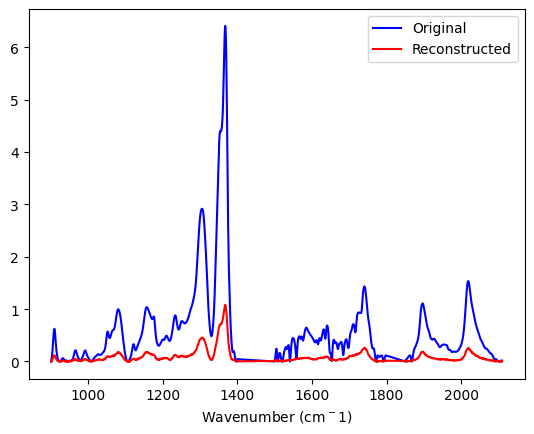

In [ ]:
plt.plot(wavenumber, absorbance, c='b')
plt.plot(wavenumber, reconstructed, c='r')
plt.legend(['Original','Reconstructed'])
plt.xlabel(f'Wavenumber (cm$^{-1}$)')
plt.show()

# Save results to dataframe

In [ ]:
hyperspectrum =pd.DataFrame(absorbance_list)
hyperspectrum.columns = wavenumber
hyperspectrum['map_x'] = df['map_x'].values
hyperspectrum['map_y'] = df['map_y'].values

Index([ 900.0,  901.0,  902.0,  903.0,  904.0,  905.0,  906.0,  907.0,  908.0,
        909.0,
       ...
       2101.0, 2102.0, 2103.0, 2104.0, 2105.0, 2106.0, 2107.0, 2108.0, 2109.0,
       2110.0],
      dtype='object', length=1063)


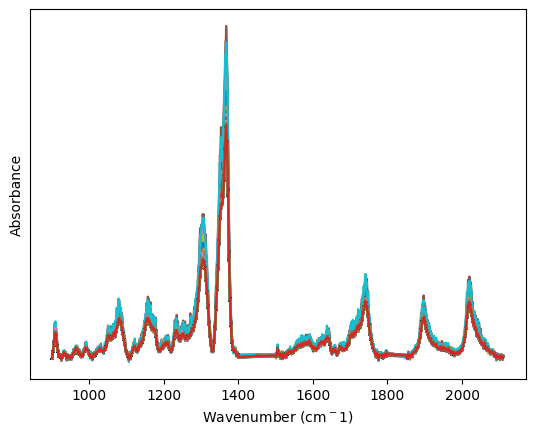

In [ ]:
reconstructed =pd.DataFrame(reconstructed_list)
reconstructed.columns = wavenumber
reconstructed['map_x'] = df['map_x'].values
reconstructed['map_y'] = df['map_y'].values

print(reconstructed.columns[:-2])
for i in range(len(reconstructed.iloc[:,:-2])):
    plt.plot(reconstructed.columns[:-2], reconstructed.iloc[i,:-2])


plt.xlabel(f'Wavenumber (cm$^{-1}$)')
plt.ylabel('Absorbance')
plt.yticks([])
plt.show()

In [ ]:
bvae_df =pd.DataFrame()
bvae_df['map_x'] = df['map_x'].values
bvae_df['map_y'] = df['map_y'].values
bvae_df['L1'] = L1_list
bvae_df['L2'] = L2_list
bvae_df['L3'] = L3_list
bvae_df['MSE'] = MSE_list

# Save to csv files for viewing in Quasar

In [ ]:

path_to_save = 'C:/Users/Zach/Documents/BVAE_processed/'
os.makedirs(path_to_save, exist_ok=True)
bvae_df.to_csv(path_to_save +'bvae_'+filename)

In [ ]:
path_to_save = "C:/Users/Zach/Documents/Hyperspectra/"
os.makedirs(path_to_save, exist_ok=True)
file=os.path.join(path_to_save + 'hyperspectrum_'+filename)
hyperspectrum.to_csv(file, index=False)

In [ ]:
path_to_save = "C:/Users/Zach/Documents/Reconstructions/"
os.makedirs(path_to_save, exist_ok=True)
reconstructed.to_csv(path_to_save +'reconstructed_'+filename, index=False)